In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
 
# Define directories for training and testing datasets
train_dir = "D:/test rice/Rice diseases/Diseases"
test_dir = "D:/test rice/Rice diseases/upload"
 
# ImageDataGenerator for augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
 
test_datagen = ImageDataGenerator(rescale=1./255)
 
# Prepare train and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
 
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for confusion matrix, to maintain order
)


Found 625 images belonging to 6 classes.
Found 183 images belonging to 6 classes.


In [2]:
# Load the pre-trained VGG16 model (without the top layers)
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model
 
# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(train_data.num_classes, activation='softmax')  # Output layer
])
 
# Compile the model with Adam optimizer and categorical crossentropy loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
 
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
 
# Train the model
history = model.fit(
    train_data,
    epochs=30,
    validation_data=test_data,
    callbacks=[early_stopping]
)
 
# Evaluate the model on the test data
evaluation = model.evaluate(test_data)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
# Confusion Matrix
y_true = test_data.classes  # True labels from the test data
y_pred = np.argmax(model.predict(test_data), axis=-1)  # Predicted labels

Epoch 1/30


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2510 - loss: 2.3912 - val_accuracy: 0.6120 - val_loss: 1.0665
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5276 - loss: 1.2710 - val_accuracy: 0.7377 - val_loss: 0.8327
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6357 - loss: 1.0084 - val_accuracy: 0.7650 - val_loss: 0.6945
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5977 - loss: 1.0473 - val_accuracy: 0.8142 - val_loss: 0.6079
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6922 - loss: 0.8312 - val_accuracy: 0.8525 - val_loss: 0.5118
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6711 - loss: 0.8651 - val_accuracy: 0.8579 - val_loss: 0.4806
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7013 - loss: 0.8106 - val_accuracy: 0.9071 - val_loss: 0.4197
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7088 - loss: 0.7581 - val_accuracy: 0.8743 - val_loss: 0.3582
Epo

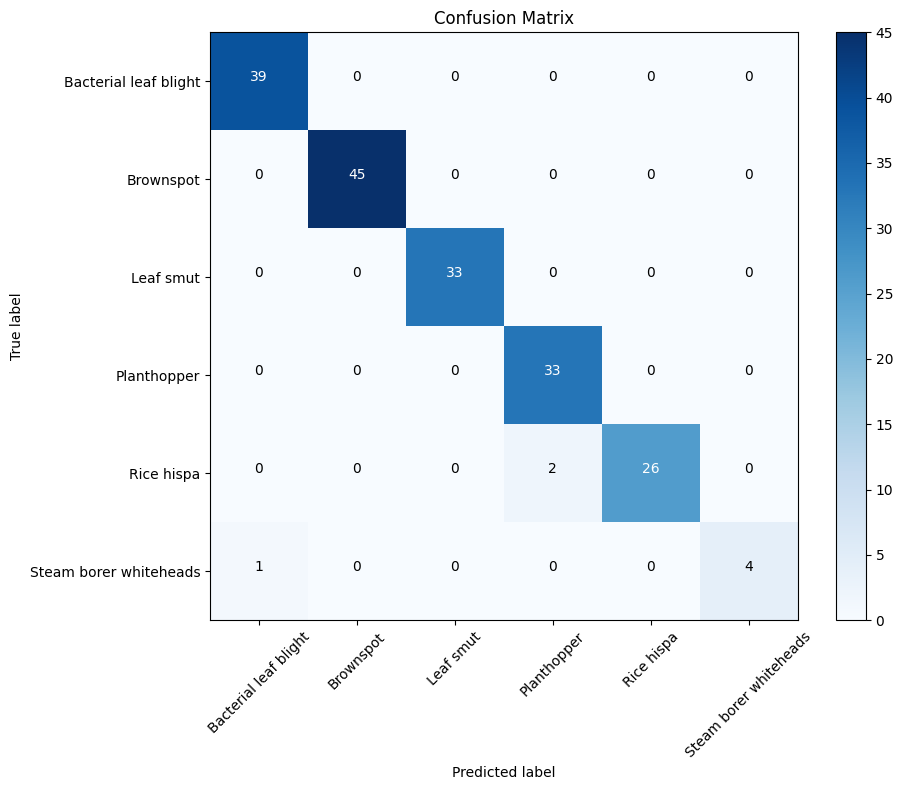

In [3]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
 
# Plot the confusion matrix using matplotlib directly
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
 
# Add class labels to x and y axis
class_names = list(test_data.class_indices.keys())
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
 
# Display the counts in each cell
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2 else "black")
 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


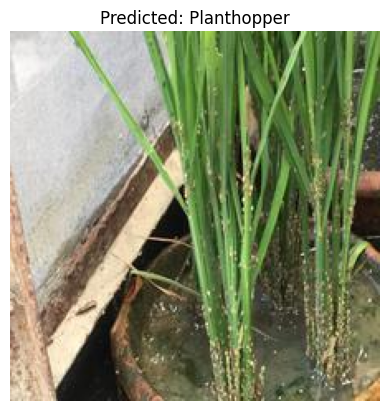

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load and preprocess a specific image
def load_and_prep_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to the specific test image (you can change this path)
img_path = 'D:/test rice/Rice diseases/upload/Planthopper/BPH1_6910f97c-761a-4adc-8a8c-d1bd0c580296.jpeg'

# Load and preprocess the image
img_array = load_and_prep_image(img_path)

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Get class names from the test dataset generator
class_names = list(test_data.class_indices.keys())
predicted_class = class_names[predicted_class_index]

# Display the image along with its predicted label
plt.imshow(image.load_img(img_path))  # Display the image
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')  # Hide axis
plt.show()


In [6]:
# Save the entire model to a HDF5 file
model.save('model.keras')
